In [1]:
%matplotlib notebook

In [2]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
mouse_df = pd.read_csv('/Users/edwardkohn/Desktop/mouse_drug_data.csv')
clinical_df = pd.read_csv('/Users/edwardkohn/Desktop/clinicaltrial_data.csv')
#merged table

mouse_clinical_comb = pd.merge(clinical_df,mouse_df,on='Mouse ID',how='left')


#rename columns for easy access
mouse_clinical_comb_df = mouse_clinical_comb.rename(columns={'Mouse ID':'Mouse_ID','Tumor Volume (mm3)':'Tumor_Volume_mm3',
                                    'Metastatic Sites':'Metastatic_Sites'})

                                             

# Tumor Response to Treatment

In [4]:
#select only columns we want for this graph
tumor_response_df = mouse_clinical_comb_df[['Drug', 'Timepoint', 'Tumor_Volume_mm3']]
#filter only by drugs we want to use
tumor_response_df_select=tumor_response_df.loc[tumor_response_df['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]


In [5]:
#create pivot tables and apply the mean to tumor volume values
mean_values = pd.pivot_table(tumor_response_df_select,index='Timepoint',columns='Drug',values='Tumor_Volume_mm3',aggfunc='mean')                                                                                                  
print(mean_values)


#apply sem to each of the drugs in the pivot table to then use them in the graph as error bars data.
capomulin_sem = mean_values['Capomulin'].sem()
infubinol_sem = mean_values['Infubinol'].sem()
ketapril_sem = mean_values['Ketapril'].sem()
placebo_sem = mean_values['Placebo'].sem()
print(capomulin_sem,infubinol_sem,ketapril_sem,placebo_sem)



Drug       Capomulin  Infubinol   Ketapril    Placebo
Timepoint                                            
0          45.000000  45.000000  45.000000  45.000000
5          44.266086  47.062001  47.389175  47.125589
10         43.084291  49.403909  49.582269  49.423329
15         42.064317  51.296397  52.399974  51.359742
20         40.716325  53.197691  54.920935  54.364417
25         39.939528  55.715252  57.678982  57.482574
30         38.769339  58.299397  60.994507  59.809063
35         37.816839  60.742461  63.371686  62.420615
40         36.958001  63.162824  66.068580  65.052675
45         36.236114  65.755562  70.662958  68.084082
0.9709032345000101 2.2059693464844656 2.671727801269364 2.4790693897668588


<IPython.core.display.Javascript object>


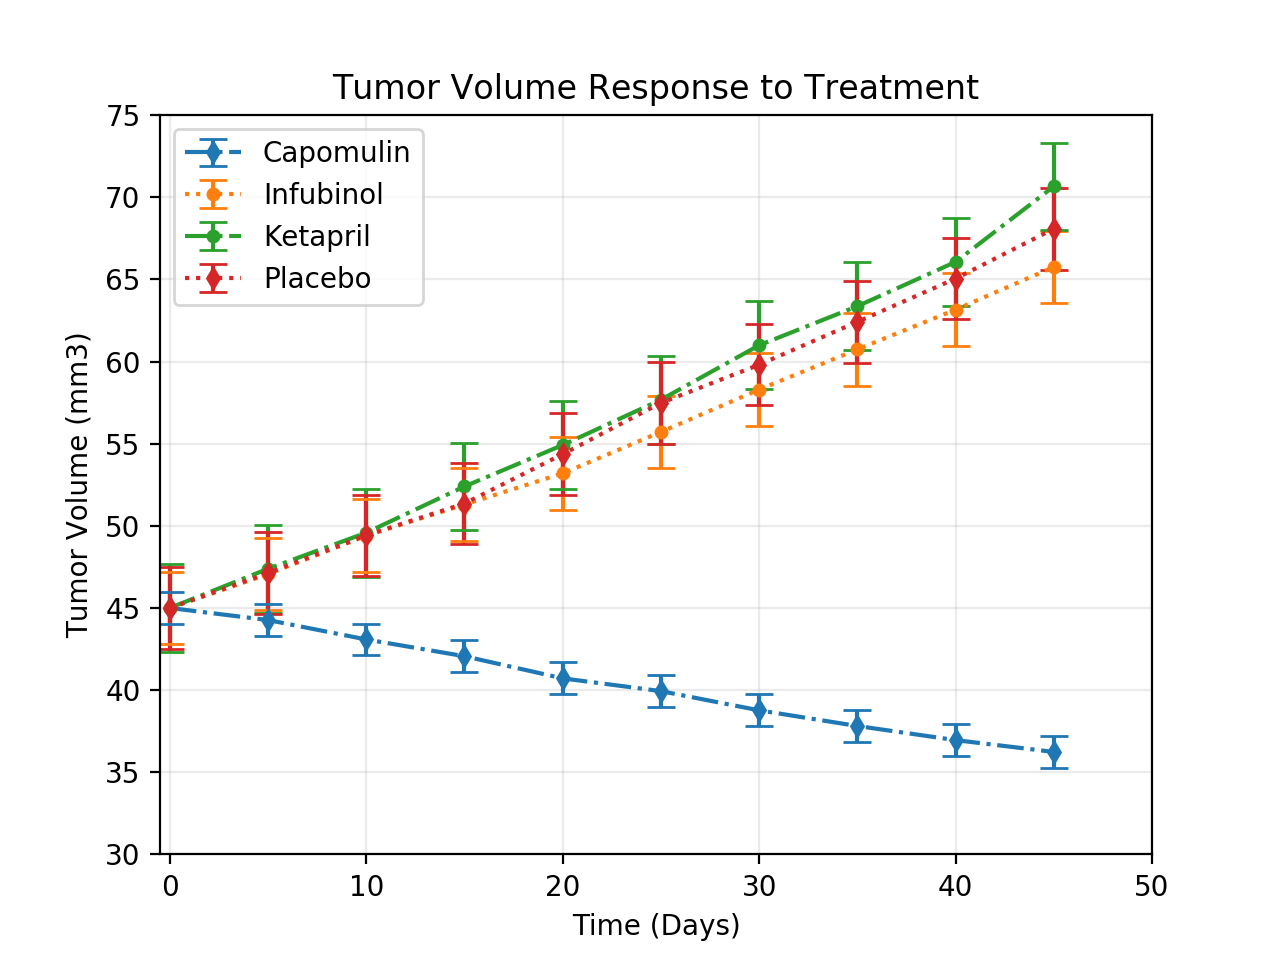

In [6]:
#plot with errors graph
fig,ax = plt.subplots()

ax.errorbar(mean_values.index,mean_values['Capomulin'],yerr=capomulin_sem,label='Capomulin',marker='d',linestyle='-.',markersize=5,capsize=5)
ax.errorbar(mean_values.index,mean_values['Infubinol'],yerr=infubinol_sem,label='Infubinol',marker='.',linestyle=':',markersize=8,capsize=5)
ax.errorbar(mean_values.index,mean_values['Ketapril'],yerr=ketapril_sem,label='Ketapril',marker='.',linestyle='-.',markersize=8,capsize=5)
ax.errorbar(mean_values.index,mean_values['Placebo'],yerr=placebo_sem,label='Placebo',marker='d',linestyle=':',markersize=5,capsize=5)

ax.legend(loc='best')
ax.set_xlim(-0.5, 50)
ax.set_ylim(30, 75)
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(alpha=0.25)

plt.title('Tumor Volume Response to Treatment')
plt.show()

fig.savefig("Figure1.png")


# Metastatic Response to Treatment

In [7]:

metastatic_response_df = mouse_clinical_comb_df[['Drug', 'Timepoint','Metastatic_Sites']]
metastatic_response_df.head()

,Drug,Timepoint,Metastatic_Sites
0,Capomulin,0,0
1,Ketapril,0,0
2,Ketapril,0,0
3,Ketapril,0,0
4,Ketapril,0,0


In [8]:
#filter only by drugs we want to use
metastatic_response_df_select = metastatic_response_df[metastatic_response_df['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]

#create pivot tables and apply the mean to metastatic values
metastic_mean_values = pd.pivot_table(metastatic_response_df_select,index='Timepoint',columns='Drug',values='Metastatic_Sites',aggfunc='mean')                                                                                                  

#apply sem to each of the drugs in the pivot table to then use them in the graph as error bars data.
metastic_capomulin_sem = metastic_mean_values['Capomulin'].sem()
metastic_infubinol_sem = metastic_mean_values['Infubinol'].sem()
metastic_ketapril_sem = metastic_mean_values['Ketapril'].sem()
metastic_placebo_sem = metastic_mean_values['Placebo'].sem()


metastic_mean_values


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


<IPython.core.display.Javascript object>


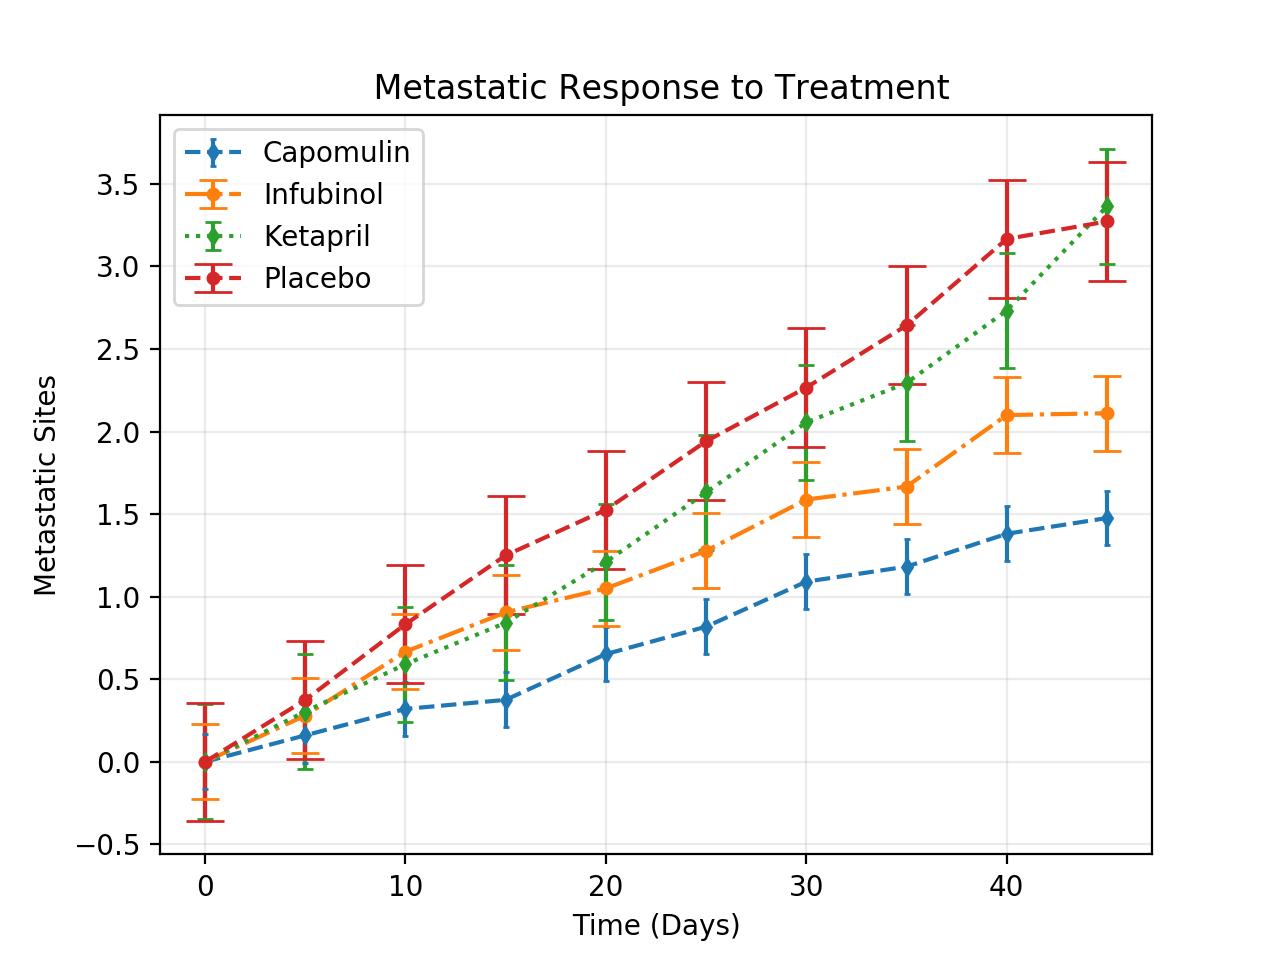

In [9]:
#plot with errors graph
fig2,ax2 = plt.subplots()

ax2.errorbar(metastic_mean_values.index,metastic_mean_values['Capomulin'],yerr=metastic_capomulin_sem,label='Capomulin',marker='d',linestyle='--',markersize=4,capsize=1)
ax2.errorbar(metastic_mean_values.index,metastic_mean_values['Infubinol'],yerr=metastic_infubinol_sem,label='Infubinol',marker='o',linestyle='dashdot',markersize=4,capsize=5)
ax2.errorbar(metastic_mean_values.index,metastic_mean_values['Ketapril'],yerr=metastic_ketapril_sem,label='Ketapril',marker='d',linestyle=':',markersize=4,capsize=3)
ax2.errorbar(metastic_mean_values.index,metastic_mean_values['Placebo'],yerr=metastic_placebo_sem,label='Placebo',marker='o',linestyle='--',markersize=4,capsize=7)

ax2.legend(loc='best')
ax2.grid(alpha=0.25)
ax2.set_xlabel('Time (Days)')
ax2.set_ylabel('Metastatic Sites')

plt.title(' Metastatic Response to Treatment')
plt.show()
fig2.savefig("Figure2.png")


# Survival Rates For Each Treatment

In [10]:
# Survival Rates
mouse_sr_df = mouse_clinical_comb_df[['Drug', 'Timepoint', 'Mouse_ID']]
#filter only by drugs we want to use
mouse_sr_drugs_select_df = mouse_sr_df[mouse_sr_df['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]

In [11]:
#create pivot tables and apply count to mouse_id
mouse_sr_pivot_df = pd.pivot_table(mouse_sr_drugs_select_df,index='Timepoint',columns='Drug',values='Mouse_ID',aggfunc='count')                                                                                                  


#add percentages columns
mouse_sr_pivot_df['Capomulin_percent']=mouse_sr_pivot_df['Capomulin']/mouse_sr_pivot_df['Capomulin'].iloc[0] *100
mouse_sr_pivot_df['Infubinol_percent']= mouse_sr_pivot_df['Infubinol']/mouse_sr_pivot_df['Infubinol'].iloc[0] *100
mouse_sr_pivot_df['Ketapril_percent']= mouse_sr_pivot_df['Ketapril']/mouse_sr_pivot_df['Ketapril'].iloc[0] *100
mouse_sr_pivot_df['Placebo_percent']= mouse_sr_pivot_df['Placebo']/mouse_sr_pivot_df['Placebo'].iloc[0] *100

mouse_sr_pivot_df

Drug,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
Timepoint,,,,,,,,
0,25,25,25,25,100.0,100.0,100.0,100.0
5,25,25,23,24,100.0,100.0,92.0,96.0
10,25,21,22,24,100.0,84.0,88.0,96.0
15,24,21,19,20,96.0,84.0,76.0,80.0
20,23,20,19,19,92.0,80.0,76.0,76.0
25,22,18,19,17,88.0,72.0,76.0,68.0
30,22,17,18,15,88.0,68.0,72.0,60.0
35,22,12,17,14,88.0,48.0,68.0,56.0
40,21,10,15,12,84.0,40.0,60.0,48.0


<IPython.core.display.Javascript object>


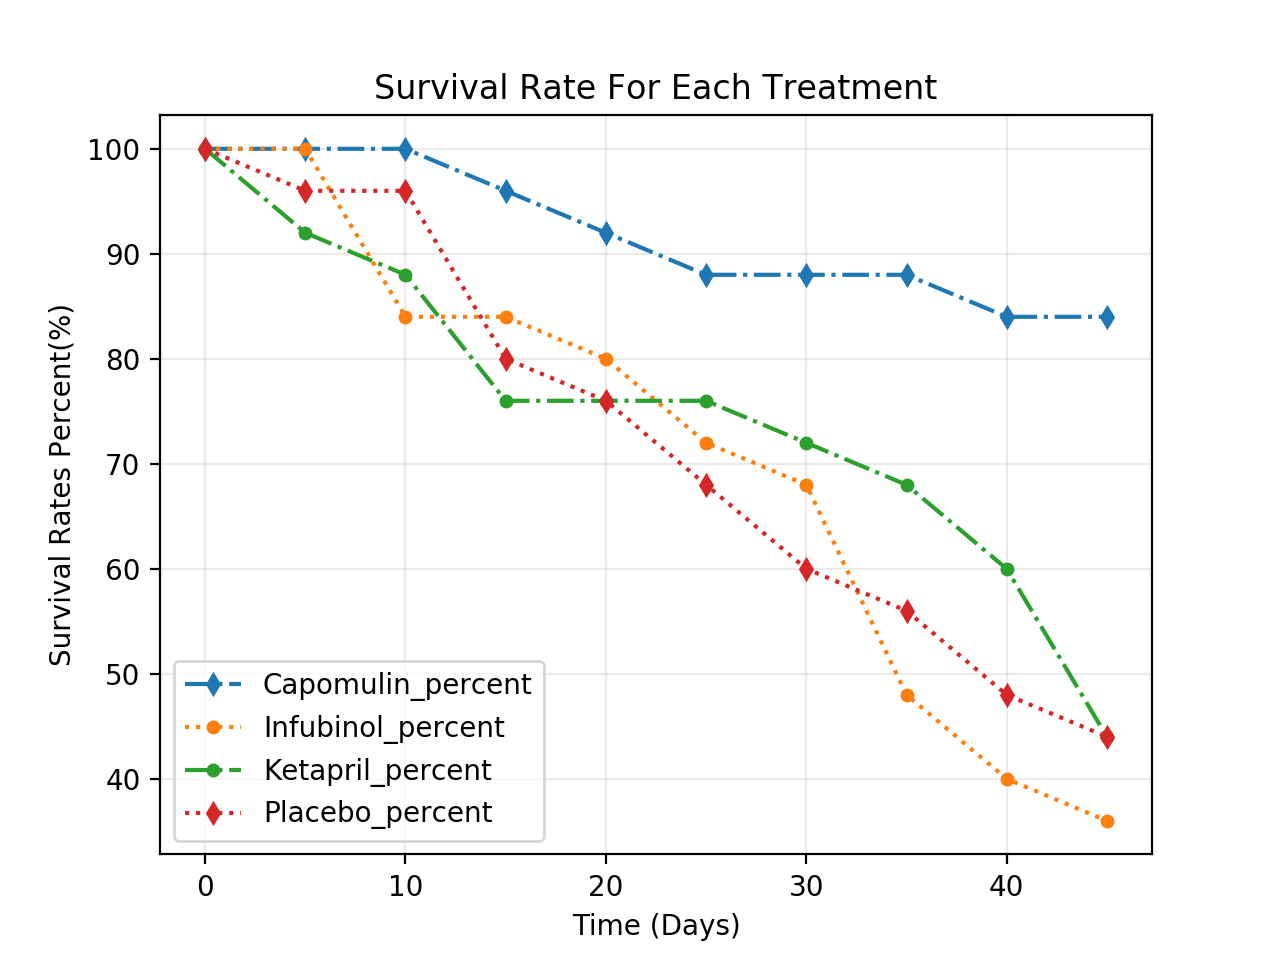

In [12]:
fig3,ax3 = plt.subplots()

ax3.plot(mouse_sr_pivot_df.index,mouse_sr_pivot_df['Capomulin_percent'],label='Capomulin_percent',marker='d',linestyle='-.',markersize=5)
ax3.plot(mouse_sr_pivot_df.index,mouse_sr_pivot_df['Infubinol_percent'],label='Infubinol_percent',marker='.',linestyle=':',markersize=8)
ax3.plot(mouse_sr_pivot_df.index,mouse_sr_pivot_df['Ketapril_percent'],label='Ketapril_percent',marker='.',linestyle='-.',markersize=8)
ax3.plot(mouse_sr_pivot_df.index,mouse_sr_pivot_df['Placebo_percent'],label='Placebo_percent',marker='d',linestyle=':',markersize=5)

ax3.legend(loc='best')

ax3.set_xlabel('Time (Days)')
ax3.set_ylabel('Survival Rates Percent(%)')
ax3.grid(alpha=0.25)

plt.title('Survival Rate For Each Treatment')
plt.show()

fig3.savefig("Figure3.png")

# bar graph that compares the total % tumor volume change for each drug across the full 45 days


In [13]:
bar_graphdata_df = mouse_clinical_comb_df[['Drug', 'Timepoint', 'Tumor_Volume_mm3']]
#filter only by drugs we want to use
bar_graphdata_df_select = bar_graphdata_df[bar_graphdata_df['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]

bar_graphdata_df_pivot = pd.pivot_table(bar_graphdata_df_select,index='Timepoint',columns='Drug',values='Tumor_Volume_mm3')
bar_graphdata_df_pivot


Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [14]:
list_of_percentage_change = []

for key,value in bar_graphdata_df_pivot.items():
    percent_changes_to_append=round((value.iloc[9] - value.iloc[0])/value.iloc[0]*100,6)
    list_of_percentage_change.append(percent_changes_to_append)


percentage_change_volume = {'Capomulin':list_of_percentage_change[0],'Infubinol':list_of_percentage_change[1],
              'Ketapril':list_of_percentage_change[2],'Placebo':list_of_percentage_change[3]}

percentage_change_volume=pd.Series(percentage_change_volume)

percentage_change_volume


Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

<IPython.core.display.Javascript object>


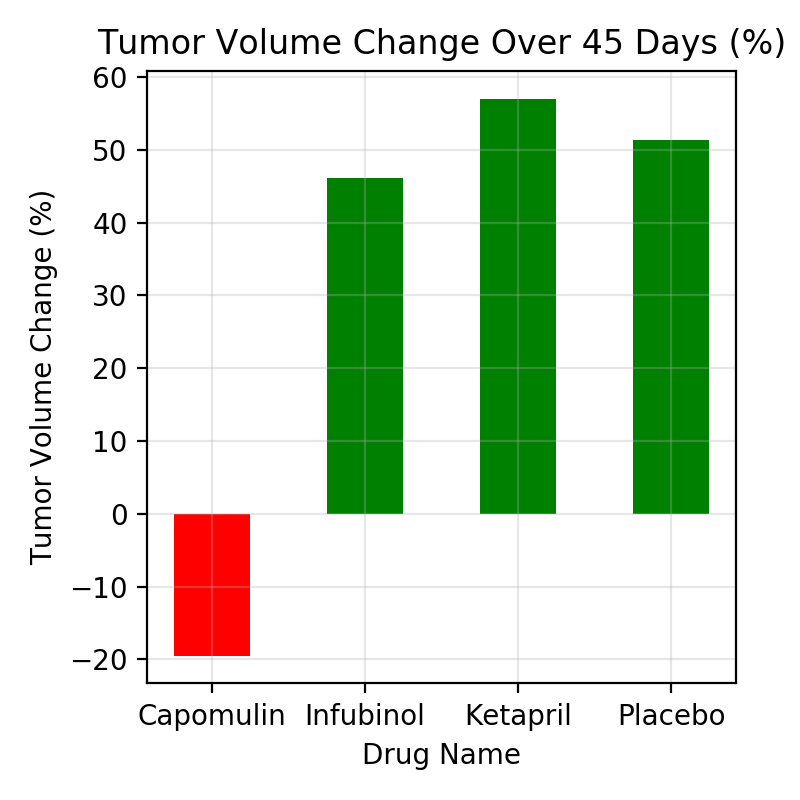

In [15]:
fig5,ax5 = plt.subplots(figsize=(4,4))
x_axis = np.arange(len(list_of_percentage_change))
labels = percentage_change_volume.keys()
y_axis = list_of_percentage_change

xticks = [value for value in range(len(list_of_percentage_change))]
plt.xticks(xticks,labels)

colors = []

for value in list_of_percentage_change:
    if value >= 0:
        colors.append('g')
    else:
        colors.append('r')
        
        
texts = [list_of_percentage_change]
ax5.bar(x_axis,y_axis,label=labels,color=colors,width=0.5)
plt.grid(alpha=0.30)
plt.title("Tumor Volume Change Over 45 Days (%)")
plt.xlabel("Drug Name")
plt.ylabel("Tumor Volume Change (%)")
plt.tight_layout()


plt.show()
fig5.savefig("Figure5.png")

# Conclusions:

In [ ]:
1)	After analyzing the data between the drugs applied to the mice in the study (Capomulin, Infubinol, Ketapril and Placebo). It can be concluded that the most effective drug is the Capomulin which was the only drug to reduce the volume of the tumor from 45(mm3) to ~36.2(mm3) accounting for ~ 19.5% reduction during the 45-day trial. Also, out all of the drugs it also had the lowest standard deviation giving us the most reliable result. On the other hand, Ketrapril was the least effective drug increasing the tumor size by ~57% and also had the highest standard deviation.

2)	All of the drugs had metastic sites increase. However, Capoulim was the most effective had the lowest metastic spread while Ketapril and Placebo had the highest spread.

3)	In the survival rate graph, we see that Capomulin has the highest rate of survival specially during the first days of the trial. Over the long rung specially after day 15 we can observe that is when the survival rate starts to slump. Another particular observation is that Infubinol survival rate is in line with Capomulin during the first 5 days then the drug has the sharpest decline out all of the drugs.

Final Thoughts:
Out of the study made the most effective drug is the Capomulin since it was the only drug that reduced the volume of the tumor, prevented a larger spread of the metastic sites and had the highest survival rate during the 45-day trial.

